Aqui importamos os módulos os e shutil, que são utilizados para manipular ficheiros e caminhos/diretórios.

Defenimos tamabém os caminhos das pastas, onde estão contidos os conjuntos/set's de treino, validação e teste.

In [7]:
import os, shutil
train_dir = '../train'
validation_dir = '../validation'
test_dir = '../test'

No seguinte código, começamos por definir a variável IMG_SIZE. Defenimos como 150x150 pois se a definíssemos com valor 32x32 (tamanho das imagens do dataset) os feature maps tornavam-se demasiado pequenos ou mesmo inválidos

Criamos os conjuntos de dados de treino, validação e teste a partir dos respetivos diretórios. Assim, é especificado o caminho do diretório para cada um dos conjuntos anteriormente relatados.

O label_mode foi definido como categorical, tendo em conta que as labels são vetores one-hot encoded.

O resante código esta implementado com um unico objetivo, dividir o dataset em 4 partes. Primeiro utilizamos uma função que devlve o tamanho do dataset e usamo-la para ir buscar o tamanho, depois com a funcao split dividimos o dataset, o que ela recebe é um dataset que queremos dividir e em quantas partes, neste caso em 1/4 do tamanho total.

In [9]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 150

train_dataset = image_dataset_from_directory(train_dir, label_mode='categorical', image_size=(IMG_SIZE, IMG_SIZE))
validation_dataset = image_dataset_from_directory(validation_dir, label_mode='categorical', image_size=(IMG_SIZE, IMG_SIZE))
test_dataset = image_dataset_from_directory(test_dir, label_mode='categorical', image_size=(IMG_SIZE, IMG_SIZE))

#### Dividir o dataset ####
def get_dataset_size(dataset):
    return sum(1 for _ in dataset)

train_size = get_dataset_size(train_dataset)
validation_size = get_dataset_size(validation_dataset)

part_train_size = train_size // 4
part_validation_size = validation_size // 4

def split_dataset(dataset, part_size):
    parts = []
    for i in range(4):
        parts.append(dataset.skip(i * part_size).take(part_size))
    return parts

train_parts = split_dataset(train_dataset, part_train_size)
validation_parts = split_dataset(validation_dataset, part_validation_size)

train_dataset_1, train_dataset_2, train_dataset_3, train_dataset_4 = train_parts
validation_dataset_1, validation_dataset_2, validation_dataset_3, validation_dataset_4 = validation_parts

print(f"Train dataset parts sizes: {[get_dataset_size(part) for part in train_parts]}")
print(f"Validation dataset parts sizes: {[get_dataset_size(part) for part in validation_parts]}")


Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Train dataset parts sizes: [312, 312, 312, 312]
Validation dataset parts sizes: [78, 78, 78, 78]


O código importa a arquitetura da rede convolucional VGG19 pré-treinada através do módulo tensorflow.keras. A VGG19 é uma arquitetura de rede neural convolucional (CNN) renomada, conhecida por sua profundidade e eficácia em tarefas de reconhecimento de imagens. 

weights='imagenet', indica que os pesos da rede foram inicializados com os valores aprendidos a partir do conjunto de dados ImageNet. 

include_top=False, configura a VGG19 para não incluir a fully connected layer no topo da rede. Isso é útil quando se deseja utilizar a rede para extração de características em vez de classificação direta. Isto permite-nos que os recursos extraídos pela VGG19 sejam utilizados como entrada para camadas posteriormente defenidas por nós, adequadas para uma tarefa específica.

input_shape=(IMG_SIZE, IMG_SIZE, 3) especifica o formato esperado para as imagens de entrada na rede.

In [10]:
from tensorflow.keras.applications.vgg19 import VGG19

conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
conv_base.trainable = False

O bloco de código abaixo mostra a funcao que usamos para extrair a features e as labels das imagens.

Ela usa a função preprocess_input do módulo keras.applications.vgg19 para pré-processar as images. Isto normaliza as imagens para que estejam no formato esperado pela rede VGG19.

A função predict é chamada para gerar as features.

In [11]:
from tensorflow import keras 
import numpy as np

def get_features_and_labels(dataset): 
    all_features = []
    all_labels = []

    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg19.preprocess_input(images) 
        features = conv_base.predict(preprocessed_images) 
        all_features.append(features)
        all_labels.append(labels)

    return np.concatenate(all_features), np.concatenate(all_labels)

O seguinte bloco de código utiliza a funcao descrita acima para extrair as features de cada subdataset.

In [12]:
#Dividimos o dataset em quatro partes
#1/4
train_features_1, train_labels_1 = get_features_and_labels(train_dataset_1)
val_features_1, val_labels_1 = get_features_and_labels(validation_dataset_1)

#2/4
train_features_2, train_labels_2 = get_features_and_labels(train_dataset_2)
val_features_2, val_labels_2 = get_features_and_labels(validation_dataset_2)

#3/4
train_features_3, train_labels_3 = get_features_and_labels(train_dataset_3)
val_features_3, val_labels_3 = get_features_and_labels(validation_dataset_3)

#4/4
train_features_4, train_labels_4 = get_features_and_labels(train_dataset_4)
val_features_4, val_labels_4 = get_features_and_labels(validation_dataset_4)

1/1 [==============================] - 3s 3s/step


O seguinte bloco de código guarda as features extraidas das imagens dos nossos datasets

In [13]:
import numpy as np

save_path = 'features/ModelT_transferLearning_featureExtraction_WithoutDataAumentation/'

np.save(save_path + 'train_features_dataset1.npy', train_features_1)
np.save(save_path + 'train_features_dataset2.npy', train_features_2)
np.save(save_path + 'train_features_dataset3.npy', train_features_3)
np.save(save_path + 'train_features_dataset4.npy', train_features_4)

np.save(save_path + 'val_features_dataset1.npy', val_features_1)
np.save(save_path + 'val_features_dataset2.npy', val_features_2)
np.save(save_path + 'val_features_dataset3.npy', val_features_3)
np.save(save_path + 'val_features_dataset4.npy', val_features_4)

np.save(save_path + 'train_features_dataset1.npy', train_labels_1)
np.save(save_path + 'train_features_dataset2.npy', train_labels_2)
np.save(save_path + 'train_features_dataset3.npy', train_labels_3)
np.save(save_path + 'train_features_dataset4.npy', train_labels_4)

np.save(save_path + 'train_features_dataset1.npy', val_labels_1)
np.save(save_path + 'train_features_dataset2.npy', val_labels_2)
np.save(save_path + 'train_features_dataset3.npy', val_labels_3)
np.save(save_path + 'train_features_dataset4.npy', val_labels_4)

O seguinte bloco de código serve para mostrar a arquitetura da vgg19

In [14]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

O seguinte bloco de código mostra a arquitetura da parte classificadora, o seguinte modelo irá ser usado para classificar as features extraidas com a função get_features_and_labels.

inputs = keras.Input(shape=(4, 4, 512)): Cria uma camada de inputs com formato (4, 4, 512), que é o formato de output (tamanho das features) da vgg19, com imagens 150x150 de input da mesma, será uma paralelipipedo com dimensão de 4x4x512

x = layers.Flatten()(inputs): A camada flatten faz com que o paralelipipedo (matriz de 3 dimensões) se torne em um vetor de uma dimensão para preparar os dados para as camadas densas

x = layers.Dense(512, activation='relu')(x): Camada densa com 512 neurônios, cada um com a função de ativação relu

x = layers.BatchNormalization()(x): Aplica normalização para melhorar a estabilidade e o desempenho da rede durante o treino

x = layers.Dropout(0.7)(x): Aplica dropout com taxa de 0.7, o que significa que aleatoriamente desativa 70% dos neurônios durante o treino para evitar overfitting. (Mais detalhes no PDF sobre este modelo)

outputs = layers.Dense(10, activation="softmax")(x): Camada de output ela tem 10 neurônios pois queremos classificar 10 classes, a função de ativação é a softmax, pois o numero de classes é superior a 2, sendo apropriada para problemas de classificação multiclasse

In [19]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.regularizers import l2

inputs = keras.Input(shape=(4, 4, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.7)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs, outputs)

O seguinte bloco de codigo mostra:

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=1e-5, weight_decay=1e-2),metrics=['accuracy']):

-> Lloss: Utiliza a função loss categorical_crossentropy, adequada para problemas de classificação multiclasse.

-> optimizer: Configura o otimizador Adam com uma taxa de aprendizado inicial de 1e-5 e weight_decay=1e-2 para penalizar os pesos maiores e ajudar a reduzir o overfitting.



early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True):

-> monitor e patience: Monitora a funcao loss, com pacieca de 15 épocas, interrompe o treino se a loss não melhorar após 15 épocas

-> restore_best_weights: restaura os pesos do modelo para a época com a melhor métrica de validação 



reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6):

-> monitor e patience: Monitora a funcao loss, com pacieca de 5 épocas, ou seja muda o lerning rate se a métrica monitorada(neste caso a loss) não mostrar melhorias após um número específico de épocas (patience), o lerning rate é reduzido de acordo com o factor

-> min_lr: limite inferior que o lerning rate pode chegar

In [20]:
#A partir deste bloco iremos treinar o modelo para os sub datasets
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=1e-5, weight_decay=1e-2),metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

O seguinte bloco de código mostra um dos vários treinos realizados, nele usamos o subdataset 1, nele especificamos o numero de epocas como 120, o batch size como 32, ou seja o numero de amostras processadas de uma vez durante cada iteração do treino, incluimos os callbacks descritos acima

In [21]:
history = model.fit(train_features_1, train_labels_1,epochs=120, batch_size=32, validation_data=(val_features_1, val_labels_1),callbacks=[early_stopping,reduce_lr])

Epoch 1/120
312/312 [==============================] - 12s 37ms/step - loss: 3.0947 - accuracy: 0.2507 - val_loss: 1.2068 - val_accuracy: 0.5998 - lr: 1.0000e-05
Epoch 2/120
312/312 [==============================] - 12s 37ms/step - loss: 1.7888 - accuracy: 0.4852 - val_loss: 0.8409 - val_accuracy: 0.7204 - lr: 1.0000e-05
Epoch 3/120
312/312 [==============================] - 11s 36ms/step - loss: 1.3575 - accuracy: 0.6006 - val_loss: 0.7064 - val_accuracy: 0.7696 - lr: 1.0000e-05
Epoch 4/120
312/312 [==============================] - 11s 36ms/step - loss: 1.1159 - accuracy: 0.6582 - val_loss: 0.6381 - val_accuracy: 0.7961 - lr: 1.0000e-05
Epoch 5/120
312/312 [==============================] - 11s 37ms/step - loss: 1.0179 - accuracy: 0.6916 - val_loss: 0.5953 - val_accuracy: 0.8105 - lr: 1.0000e-05
Epoch 6/120
312/312 [==============================] - 11s 37ms/step - loss: 0.8739 - accuracy: 0.7325 - val_loss: 0.5673 - val_accuracy: 0.8213 - lr: 1.0000e-05
Epoch 7/120
312/312 [=======

O seguinte bloco de código mostra, a realização de um gráfico época a época, onde são registados e visualizados os respetivos valores de accuracy e loss do nosso modelo. Este ponto é muito importante, para poder comparar a evolução entre as épocas de um treino, bem como, por exemplo, quando realizamos alterações à rede e queremos ver a evolução comparando com versões anteriores.

O resultado mostra-nos que o modelo esta com um pouco de overfiting e estagnado aproximadamente nos 0.86

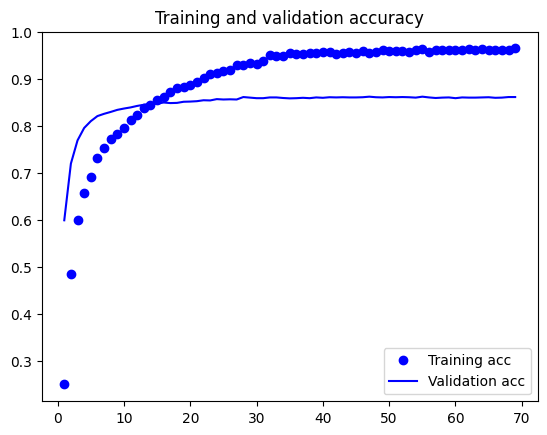

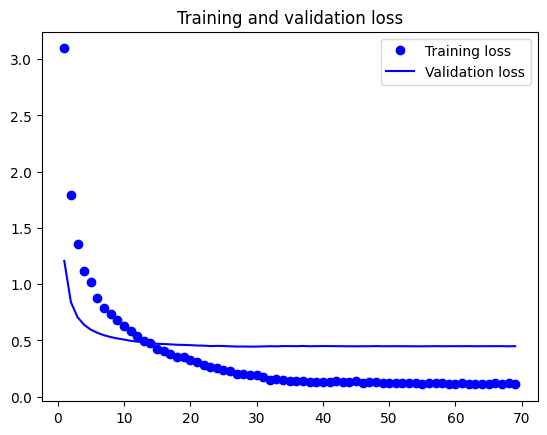

In [25]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc,'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

O seguinte bloco de código mostra mais um treino realizado, mas agora com o subdataset 2, nele aumentamos o weight_decay para penalizar mais os pesos maiores e ajudar a reduzir o overfitting.

Mudamos o valor do learning rate colocando = 1e-6 pois se o colocássemos maior o overffiting piorava, tambem mudamos o valor do ReduceLROnPlateau min_lr=1e-7

In [26]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=1e-6, weight_decay=1e-1),metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

history = model.fit(train_features_2, train_labels_2,epochs=120, batch_size=32, validation_data=(val_features_2, val_labels_2),callbacks=[early_stopping,reduce_lr])

Epoch 1/120
312/312 [==============================] - 13s 40ms/step - loss: 0.7243 - accuracy: 0.7963 - val_loss: 0.4368 - val_accuracy: 0.8614 - lr: 1.0000e-06
Epoch 2/120
312/312 [==============================] - 12s 37ms/step - loss: 0.7040 - accuracy: 0.7976 - val_loss: 0.4354 - val_accuracy: 0.8626 - lr: 1.0000e-06
Epoch 3/120
312/312 [==============================] - 12s 37ms/step - loss: 0.7060 - accuracy: 0.8017 - val_loss: 0.4344 - val_accuracy: 0.8654 - lr: 1.0000e-06
Epoch 4/120
312/312 [==============================] - 12s 38ms/step - loss: 0.6954 - accuracy: 0.8048 - val_loss: 0.4336 - val_accuracy: 0.8638 - lr: 1.0000e-06
Epoch 5/120
312/312 [==============================] - 11s 37ms/step - loss: 0.6974 - accuracy: 0.8022 - val_loss: 0.4325 - val_accuracy: 0.8650 - lr: 1.0000e-06
Epoch 6/120
312/312 [==============================] - 11s 36ms/step - loss: 0.6930 - accuracy: 0.8032 - val_loss: 0.4321 - val_accuracy: 0.8642 - lr: 1.0000e-06
Epoch 7/120
312/312 [=======

Verificar os resultados obtidos, agora o modelo chegou a 0.87 mas continua com um pouco de overfiting

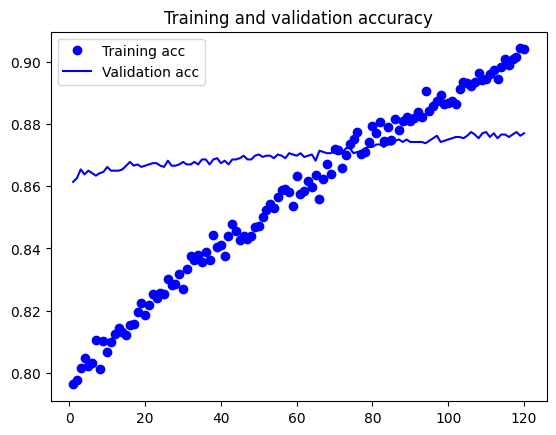

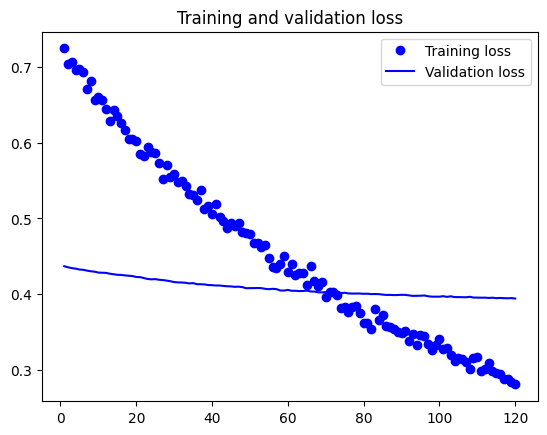

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc,'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

O seguinte bloco de código mostra mais um treino realizado, mas agora com o subdataset 3, nele aumentamos o weight_decay para penalizar ainda mais os pesos maiores e ajudar a reduzir o overfitting.

In [36]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=1e-6, weight_decay=0.5),metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

history = model.fit(train_features_3, train_labels_3,epochs=120, batch_size=32, validation_data=(val_features_3, val_labels_3),callbacks=[early_stopping,reduce_lr])

Epoch 1/120
312/312 [==============================] - 13s 39ms/step - loss: 0.2775 - accuracy: 0.9082 - val_loss: 0.3137 - val_accuracy: 0.8986 - lr: 1.0000e-06
Epoch 2/120
312/312 [==============================] - 12s 37ms/step - loss: 0.2872 - accuracy: 0.9031 - val_loss: 0.3135 - val_accuracy: 0.8998 - lr: 1.0000e-06
Epoch 3/120
312/312 [==============================] - 11s 37ms/step - loss: 0.2916 - accuracy: 0.8986 - val_loss: 0.3137 - val_accuracy: 0.8994 - lr: 1.0000e-06
Epoch 4/120
312/312 [==============================] - 11s 37ms/step - loss: 0.2787 - accuracy: 0.9040 - val_loss: 0.3143 - val_accuracy: 0.8990 - lr: 1.0000e-06
Epoch 5/120
312/312 [==============================] - 11s 37ms/step - loss: 0.2770 - accuracy: 0.9069 - val_loss: 0.3138 - val_accuracy: 0.8994 - lr: 1.0000e-06
Epoch 6/120
312/312 [==============================] - 12s 40ms/step - loss: 0.2710 - accuracy: 0.9072 - val_loss: 0.3139 - val_accuracy: 0.9002 - lr: 1.0000e-06
Epoch 7/120
312/312 [=======

Verificar os resultados obtidos, agora o modelo chegou a 0.90 convergindo ainda mais e cconseguimos reduzir o overffiting

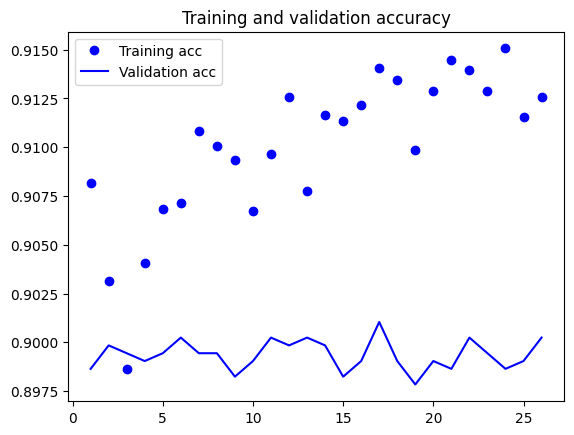

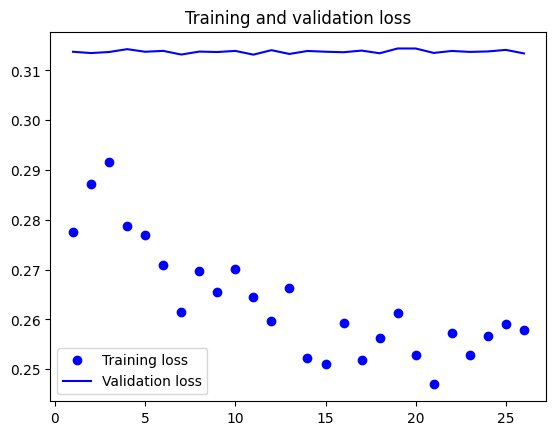

In [37]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc,'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Fazer mais um treino agora com o subdataset 4 para ver se os resultados obtidos anteriormente contunuavam a melhorar

In [33]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=1e-6, weight_decay=0.5),metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

history = model.fit(train_features_4, train_labels_4,epochs=120, batch_size=32, validation_data=(val_features_4, val_labels_4),callbacks=[early_stopping,reduce_lr])

Epoch 1/120
312/312 [==============================] - 13s 38ms/step - loss: 0.5760 - accuracy: 0.8308 - val_loss: 0.3665 - val_accuracy: 0.8822 - lr: 1.0000e-06
Epoch 2/120
312/312 [==============================] - 12s 38ms/step - loss: 0.5628 - accuracy: 0.8334 - val_loss: 0.3663 - val_accuracy: 0.8826 - lr: 1.0000e-06
Epoch 3/120
312/312 [==============================] - 12s 37ms/step - loss: 0.5652 - accuracy: 0.8322 - val_loss: 0.3664 - val_accuracy: 0.8818 - lr: 1.0000e-06
Epoch 4/120
312/312 [==============================] - 12s 37ms/step - loss: 0.5643 - accuracy: 0.8305 - val_loss: 0.3657 - val_accuracy: 0.8834 - lr: 1.0000e-06
Epoch 5/120
312/312 [==============================] - 12s 38ms/step - loss: 0.5630 - accuracy: 0.8345 - val_loss: 0.3653 - val_accuracy: 0.8822 - lr: 1.0000e-06
Epoch 6/120
312/312 [==============================] - 11s 36ms/step - loss: 0.5480 - accuracy: 0.8334 - val_loss: 0.3654 - val_accuracy: 0.8818 - lr: 1.0000e-06
Epoch 7/120
312/312 [=======

Verificar os resultados obtidos, o modelo continuou com os mesmos resultados, podemos observar que tem um pouco de overffiting 

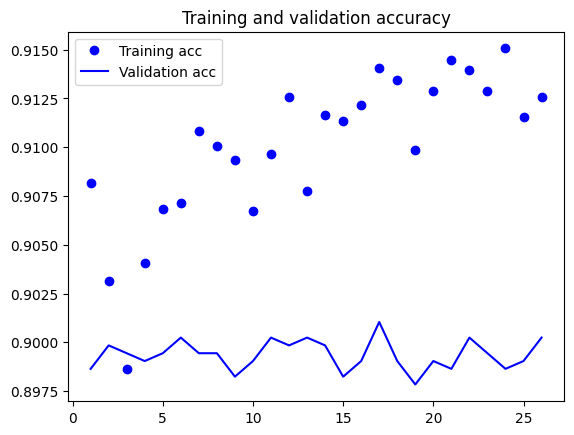

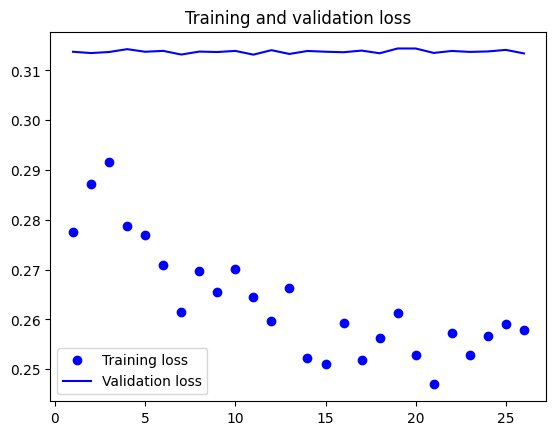

In [38]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc,'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Guarar o modelo para classificar imagens posteriormente, usando o website criado

Ao guardar o modelo colocámos a vgg19 e a rede de classificação treinada posteriormente

In [39]:
from keras import models
inputs = keras.Input(shape=(150, 150, 3))
x = keras.applications.vgg19.preprocess_input(inputs) 
x = conv_base(x)
outputs = model(x)
full_model = keras.Model(inputs, outputs)

full_model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=1e-6, weight_decay=0.5),metrics=['accuracy'])

Guardar os modelos

No seguinte bloco de código guardámos o modelo completo incluindo a vgg19 e o modelo que fez apenas a parte de classificação

In [40]:
full_model.save('models/ModelT_transferLearning_featureExtraction_WithoutDataAumentation.h5')
model.save('models/ModelT_transferLearning_featureExtraction_WithoutDataAumentation_OnlyClassification.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Carregar o modelo para testá-lo com o dataset de validação e de teste

In [41]:
from tensorflow import keras

loaded_model = keras.models.load_model('models/ModelT_transferLearning_featureExtraction_WithoutDataAumentation.h5')

val_loss, val_acc = loaded_model.evaluate(validation_dataset)
print('val_acc:', val_acc)

313/313 [==============================] - 1125s 4s/step - loss: 0.3446 - accuracy: 0.8899
val_acc: 0.8899000287055969


In [42]:
val_loss, val_acc = loaded_model.evaluate(test_dataset) 
print('val_acc:', val_acc)

313/313 [==============================] - 1127s 4s/step - loss: 0.3643 - accuracy: 0.8837
val_acc: 0.8837000131607056


Como principal extra do nosso projeto, para além do optimizer utilizado, tipos de data augmentation utilizados e outras funções que vão para além das utilizadas nas aulas, decidimos desenvolver um website que utiliza os modelos dos nossos notebook's. Assim, foi necessário utilizar o tensorflowjs_converter, que é uma biblioteca python, que permite converter o modelo de formato h5 para json, de forma a ser possível implementar a utilização do respetivo modelo no website. Posteriormente a este passo, e após termos o modelo em json, implementámos o código via JavaScript que faz a interligação entre o website e o modelo. O código JavaScript está disponível no ficheiro da diretoria ./web/main.js.

Para utilizar o nosso website, visto que não está publicado na web, é necessário instalar o VSCode e a respetiva externsão de live server, e correr o ficheiro index.html na diretoria ./web/index.html. A interação com a app web é simples, selecionar o tipo de modelo a ser utilizado, selecionar uma fotografia e realizar a operação de predict chamando o nosso modelo, por sua vez em json. Por fim, será apresentada uma label com a predicted class e também um gráfico de API Alphabet Google com as probabilidades para cada classe da nossa rede. O nosso website, permite também alternar entre tema claro e escuro, conforme a preferência do utilizador.

Assim, apresentamos um exemplo da interface web que podem esperar:

![GUI do website](../img/GUI.png "GUI do website")

Para gerir e trabalhar em grupo neste projeto, foi utilizado o software GitHub. O nosso repositório GitHub cumpre com toda a organização e logística que são essênciais para um projeto na nossa área. 

Explicação dos objetivos de cada pasta do nosso Repositório (Para respetiva consulta de informação):
##### Pasta DOC: Contém o enunciado do projeto
##### Pasta WEB: Contém o Website desenvolvido relatado anteriormente
##### Pastas TEST, VALIDATION e TRAIN: Contém os dataset's de teste, validação e treino, respetivamente, da nossa rede
##### Pasta NOTEBOOKS: Contém os nossos notebook's com output e comentários, bem como as suas versões clean e os modelos gerados pelo treino da rede bem como a conversão para JSON
##### Pasta RESULTS: Contém os resultados dos treinos das nossas redes (Importante a sua consulta)
##### Pasta IMG: Contém imagens auxiliáres
##### Ficheiro README: Contém a apresentação do projeto e a distinção das pastas de treino/validação (dataset's)
##### Ficheiro NOTAS: Contém notas que pretendemos guardas para consulta posterior (Apenas para partilhar informalção entre os membros do grupo)

Para consulta deixamos o seguinte link (carregar em cima da fotografia do ícone do GitHub):

[![GitHub](../img/github-logo.png)](https://github.com/goncaloferreira966/Projeto_IA)]

### Powered By:
##### Gonçalo Ferreira, nº 2222051
##### José Delgado, nº 2222049